<img src=https://lstms-brainybits.s3.ap-south-1.amazonaws.com/green+logo.png width="300" height="200" style="float: left; margin-right: 8px;">

We believe in empowering individuals with the
knowledge and skills they need to become lifelong
learners. Our self-learning website offers a diverse
range of high-quality, interactive courses.
**All rights reserved to BrainyBits. Unauthorized reproduction or distribution of this content is prohibited.**

# Principal Component Analysis

### 1. Importing libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2.Loading the dataset

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


In [5]:
df.shape

(14999, 10)

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df_drop=df.drop(labels=['sales','salary'],axis=1)
df_drop.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [8]:
cols = df_drop.columns.tolist()

cols.insert(0, cols.pop(cols.index('left')))

df_drop = df_drop.reindex(columns= cols)
df_drop.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,1,0.38,0.53,2,157,3,0,0
1,1,0.80,0.86,5,262,6,0,0
2,1,0.11,0.88,7,272,4,0,0
3,1,0.72,0.87,5,223,5,0,0
4,1,0.37,0.52,2,159,3,0,0


In [9]:
df_drop.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

### 3. Splitting the data

In [10]:
X = df_drop.iloc[:,1:8].values
y = df_drop.iloc[:,0].values
X

array([[0.38, 0.53, 2.  , ..., 3.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 6.  , 0.  , 0.  ],
       [0.11, 0.88, 7.  , ..., 4.  , 0.  , 0.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 3.  , 0.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 4.  , 0.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 3.  , 0.  , 0.  ]])

In [11]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [12]:

import numpy as np
np.shape(X)

(14999, 7)

In [13]:
np.shape(y)

(14999,)

### 4. Data Standardisation 

In [14]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

### 5. Covariance matrix

In [15]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
cov_mat

array([[ 1.00006668,  0.10502822, -0.14297912, -0.02004945, -0.1008728 ,
         0.05870115,  0.02560689],
       [ 0.10502822,  1.00006668,  0.34935588,  0.33976445,  0.1315995 ,
        -0.00710476, -0.00868435],
       [-0.14297912,  0.34935588,  1.00006668,  0.41723845,  0.19679901,
        -0.00474086, -0.00606436],
       [-0.02004945,  0.33976445,  0.41723845,  1.00006668,  0.12776343,
        -0.01014356, -0.00354465],
       [-0.1008728 ,  0.1315995 ,  0.19679901,  0.12776343,  1.00006668,
         0.00212056,  0.06743742],
       [ 0.05870115, -0.00710476, -0.00474086, -0.01014356,  0.00212056,
         1.00006668,  0.03924805],
       [ 0.02560689, -0.00868435, -0.00606436, -0.00354465,  0.06743742,
         0.03924805,  1.00006668]])

Text(0.5, 1.0, 'Correlation between different features')

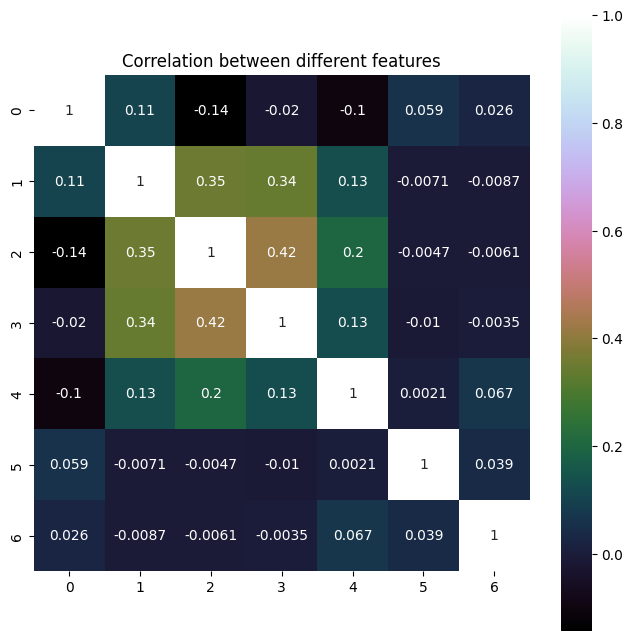

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

### 6. Eigen decomposition of the covariance matrix

In [17]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.08797699  0.29189921  0.27784886  0.33637135  0.79752505  0.26786864
  -0.09438973]
 [-0.50695734 -0.30996609 -0.70780994  0.07393548  0.33180877  0.1101505
  -0.13499526]
 [-0.5788351   0.77736008 -0.00657105 -0.19677589 -0.10338032 -0.10336241
  -0.02293518]
 [-0.54901653 -0.45787675  0.63497294 -0.25170987  0.10388959 -0.01034922
  -0.10714981]
 [-0.31354922 -0.05287224  0.12200054  0.78782241 -0.28404472  0.04036861
   0.42547869]
 [ 0.01930249 -0.04433104 -0.03622859 -0.05762997  0.37489883 -0.8048393
   0.45245222]
 [-0.00996933 -0.00391698 -0.04873036 -0.39411153  0.10557298  0.50589173
   0.75836313]]

Eigenvalues 
[1.83017431 0.54823098 0.63363587 0.84548166 1.12659606 0.95598647
 1.06036136]


In [18]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

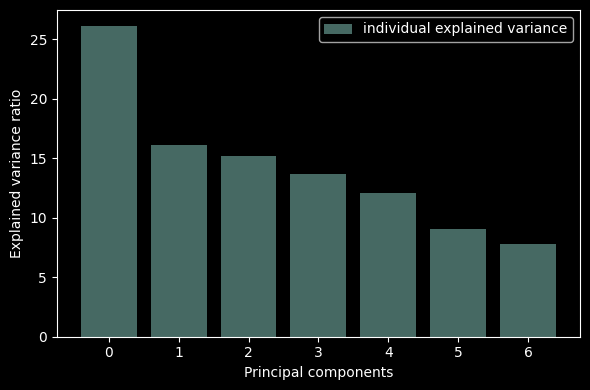

In [19]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

### 7. Applying PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-4.40682814e+01, -6.85590899e-01,  1.20311482e+00, ...,
         2.82386023e-01,  3.55935813e-02, -1.86478694e-02],
       [ 6.09678054e+01,  2.33866530e+00,  7.74501547e-02, ...,
        -2.54640098e-01, -1.45126716e-03, -3.89674130e-02],
       [ 7.09804156e+01,  9.11031234e-01, -2.32102014e+00, ...,
         3.97179480e-01, -6.55540542e-02,  5.48764427e-03],
       ...,
       [-5.80674300e+01, -5.95449610e-01,  1.07801005e+00, ...,
         2.86439309e-01,  2.37992502e-02, -1.68581374e-02],
       [ 7.89697212e+01,  5.88409043e-01, -1.29117353e+00, ...,
         4.11515193e-01, -1.76298342e-01,  2.13644348e-02],
       [-4.30683528e+01, -6.91952453e-01,  1.21207711e+00, ...,
         2.94340839e-01,  4.43804824e-02, -1.97552251e-02]])

In [21]:
pca.get_covariance()

array([[ 6.18172006e-02,  4.46948100e-03, -4.38144936e-02,
        -2.48945147e-01, -3.66178765e-02,  5.13295708e-03,
         9.18529564e-04],
       [ 4.46948100e-03,  2.92988644e-02,  7.37027964e-02,
         2.90435613e+00,  3.28884982e-02, -4.27701981e-04,
        -2.14458934e-04],
       [-4.38144936e-02,  7.37027964e-02,  1.51928391e+00,
         2.56832707e+01,  3.54165950e-01, -2.05514879e-03,
        -1.07841567e-03],
       [-2.48945147e-01,  2.90435613e+00,  2.56832707e+01,
         2.49431317e+03,  9.31636444e+00, -1.78169108e-01,
        -2.55405657e-02],
       [-3.66178765e-02,  3.28884982e-02,  3.54165950e-01,
         9.31636444e+00,  2.13199781e+00,  1.08895556e-03,
         1.42061344e-02],
       [ 5.13295708e-03, -4.27701981e-04, -2.05514879e-03,
        -1.78169108e-01,  1.08895556e-03,  1.23705940e-01,
         1.99156718e-03],
       [ 9.18529564e-04, -2.14458934e-04, -1.07841567e-03,
        -2.55405657e-02,  1.42061344e-02,  1.99156718e-03,
         2.0817141

In [22]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.98565340e-01, 8.69246970e-04, 4.73865973e-04, 4.96932182e-05,
       2.43172315e-05, 9.29496619e-06, 8.24128218e-06])

Text(0, 0.5, 'Cumulative explained variance')

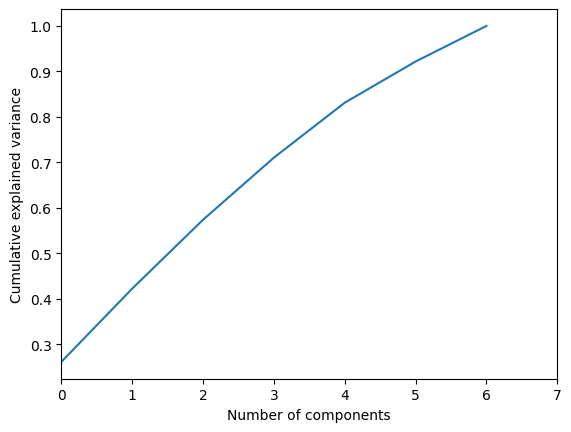

In [23]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [24]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [25]:
print(Y_sklearn)

[[-1.90035018 -1.12083103 -0.0797787   0.03228437 -0.07256447  0.06063013]
 [ 2.1358322   0.2493369   0.0936161   0.50676925  1.2487747  -0.61378158]
 [ 3.05891625 -1.68312693 -0.301682   -0.4488635  -1.12495888  0.29066929]
 ...
 [-2.0507165  -1.182032   -0.04594506  0.02441143 -0.01553247  0.24980658]
 [ 2.91418496 -1.42752606 -0.36333357 -0.31517759 -0.97107375  0.51444624]
 [-1.91543672 -1.17021407 -0.07024077  0.01486762 -0.09545357  0.01773844]]
